In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv("Covid cases in India.csv")
print(df.head())

   S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0       1     Andhra Pradesh                                      757   
1       2       Chhattisgarh                                       10   
2       3              Delhi                                     2081   
3       4            Gujarat                                     2066   
4       5            Haryana                                     1000   

   Total Confirmed cases ( Foreign National )  Cured  Death  
0                                           0      2      4  
1                                           0      2      3  
2                                         700     50    104  
3                                           0     25      8  
4                                          19     11      3  


In [3]:
df.drop(['S. No.'], axis=1, inplace=True)
print(df.head())

  Name of State / UT  Total Confirmed cases (Indian National)  \
0     Andhra Pradesh                                      757   
1       Chhattisgarh                                       10   
2              Delhi                                     2081   
3            Gujarat                                     2066   
4            Haryana                                     1000   

   Total Confirmed cases ( Foreign National )  Cured  Death  
0                                           0      2      4  
1                                           0      2      3  
2                                         700     50    104  
3                                           0     25      8  
4                                          19     11      3  


In [4]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
print(df.head())

  Name of State / UT  Total Confirmed cases (Indian National)  \
0     Andhra Pradesh                                      757   
1       Chhattisgarh                                       10   
2              Delhi                                     2081   
3            Gujarat                                     2066   
4            Haryana                                     1000   

   Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  
0                                           0      2      4          757  
1                                           0      2      3           10  
2                                         700     50    104         2781  
3                                           0     25      8         2066  
4                                          19     11      3         1019  


In [5]:
total_cases_overall = df['Total Cases'].sum()
print('Total number cases in India are',total_cases_overall)


Total number cases in India are 20873


In [6]:
df['Active Cases']= df['Total Cases']-(df['Death']+df['Cured'])
print(df.head())

  Name of State / UT  Total Confirmed cases (Indian National)  \
0     Andhra Pradesh                                      757   
1       Chhattisgarh                                       10   
2              Delhi                                     2081   
3            Gujarat                                     2066   
4            Haryana                                     1000   

   Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  \
0                                           0      2      4          757   
1                                           0      2      3           10   
2                                         700     50    104         2781   
3                                           0     25      8         2066   
4                                          19     11      3         1019   

   Active Cases  
0           751  
1             5  
2          2627  
3          2033  
4          1005  


In [7]:
Total_Active_Cases = df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()
print(Total_Active_Cases)

                    Total Cases
Name of State / UT             
Maharashtra                4672
Delhi                      2781
Gujarat                    2066
Rajasthan                  1578
Madhya Pradesh             1540
Tamil Nadu                 1523
Uttar Pradesh              1295
Haryana                    1019
Telengana                   922
Punjab                      900
Andhra Pradesh              757
Chandigarh                  400
Kerala                      372
Goa                         200
Karnataka                   200
Jammu and Kashmir           158
West Bengal                 120
Manipur                     100
Mizoram                      56
Himachal Pradesh             50
Odisha                       50
Bihar                        39
Uttarakhand                  35
Ladakh                       20
Chhattisgarh                 10
Puducherry                   10


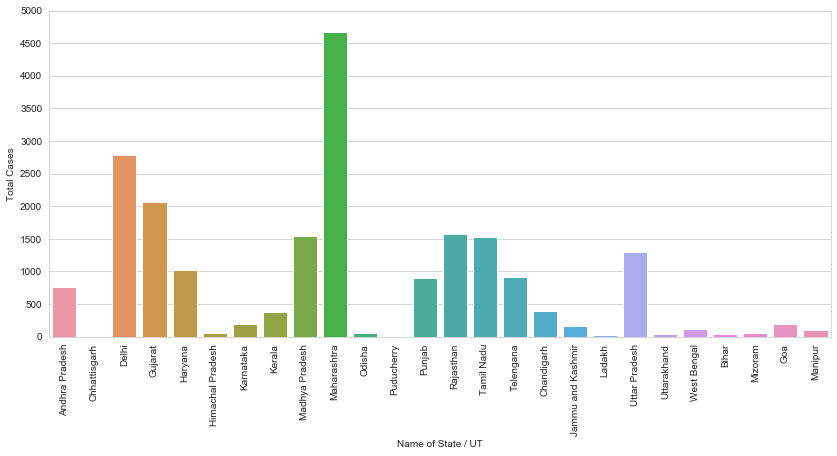

In [8]:
plt.figure(figsize=(14,6))
sns.barplot(x='Name of State / UT', y='Total Cases',data=df)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0,5500,500))
plt.show()